In [1]:
from statistics import variance,stdev
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.dpi'] = 120

# **Descriptive Statistics**

**Descriptive statistics involves summarizing and organizing data. The data analyzed by descriptive statistics is usually a sample of a population of data. Measures such as the mean, median, mode, variance and standard deviation describe the data; the data can also be summarized visually with graphs such as histograms.**

<sup>Source: [Descriptive Statistics](https://sites.nicholas.duke.edu/statsreview/descriptive/) by Elizabeth A. Albright from the Nicholas School of the Environment at Duke University<sup/>

# **Measures of Spread/Variation**

**Measures of spread describe how similar or varied the set of observed values are for a particular data set.**

<sup>Source: [Statistical Language - Measures of Spread](https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread) from the Australian Bureau of Statistics<sup/>

# **Scenario**

**You are looking to purchase a home in a certain neighborhood. You are given a data set of 91 houses that were sold over the past year in and around the neighborhood. Assuming that the houses are relatively similar, you want to purchase a house for the best price in the neighborhood.**

In [3]:
house_prices = [261429, 108016, 149804, 314576, 173078, 192808, 174740, 193749, 212806, 128917, 105543,
                219793, 64455, 191498, 147990, 295918, 119061, 283888, 218107, 228113, 146236, 275903,
                218361, 241315, 90478, 297415, 204704, 215156, 236160, 205808, 280648, 171543, 185478,
                137630, 435001, 204308, 101965, 115640, 236203, 291383, 329981, 144448, 289869, 170624,
                259818, 224884, 187041, 195165, 216013, 157346, 227610, 199772, 165773, 195000, 182317,
                322152, 216160, 222152, 141617, 138964, 152813, 172420, 195081, 215409, 97962, 180583, 
                262032, 218123, 245808, 168979, 172987, 168518, 156300, 144459, 282107, 221822, 209387,
                93488, 273577, 308442, 180603, 194489, 229947, 264467, 120122, 282001, 184931, 70867, 
                218052, 119091, 94923]


print(f'There are {len(house_prices)} houses in the data set')

There are 91 houses in the data set


## **Arithmetic Mean (Average)**

**The arithmetic mean (average) is a measure of central tendency of a data set.**

$\large{\text{Arithmetic Mean}} =$ $\LARGE{\frac{\sum^n_{i=1}y_i}{n}} = \bar{y}$

<sup>Source: [Statistics for Engineering and the Sciences 6th Edition](https://www.amazon.com/Statistics-Engineering-Sciences-William-Mendenhall/dp/1498728855) by William M. Mendenhall and Terry L. Sincich<sup/>

In [4]:
def mean_calc(data_set):
    return sum(data_set)/len(data_set)

mean_house_price = mean_calc(house_prices)
mean_house_price

199583.73626373627

## **Variance**

**Variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.**

**From the formulas below, we can see in the denominator of the sample variance we have $n-1$ while in the population variance the denominator is $n$. If the sample variance is divided by $n$, the formula would return a smaller estimate that is biased low.**

$\Large{\text{Sample Variance} = s^2 =  \frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n-1}}$

$\Large{\text{Population Variance} = \sigma^2 =  \frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n}}$

<sup>Source: [Variance](https://en.wikipedia.org/wiki/Variance) from Wikipedia.org<sup/>

<sup>Source: [Statistics for Engineering and the Sciences 6th Edition](https://www.amazon.com/Statistics-Engineering-Sciences-William-Mendenhall/dp/1498728855) by William M. Mendenhall and Terry L. Sincich<sup/>

In [5]:
def sample_var_calc(data_set):
    data_set_length = len(data_set)
    mean = mean_calc(data_set)
    variance = sum([(y-mean)**2 for y in data_set])/(data_set_length-1)
    return variance

In [8]:
sample_var_calc(house_prices) == variance(house_prices)

True

# **Standard Deviation**

**Standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.**

**A useful property of the standard deviation is that, unlike the variance, it is expressed in the same unit as the data.**

$\Large{\text{Sample Standard Deviation} = s = \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n-1}}}$

$\Large{\text{Population Standard Deviation} = \sigma =  \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n}}}$

<sup>Source: [Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation) from Wikipedia.org<sup/>
    
<sup>Source: [Estimation and Confidence Intervals](https://www0.gsb.columbia.edu/faculty/pglasserman/B6014/ConfidenceIntervals.pdf) by Paul Glasserman from Columbia Business School<sup/>

In [9]:
def sample_stdev_calc(data_set):
    data_set_length = len(data_set)
    mean = mean_calc(data_set)
    variance = sum([(y-mean)**2 for y in data_set])/(data_set_length-1)
    return variance**(1/2)

house_price_deviation = stdev(house_prices)
house_price_deviation

66113.187900051

In [13]:
stdev(house_prices) == house_price_deviation

True

In [14]:
stdev_range = [mean_house_price-house_price_deviation,mean_house_price+house_price_deviation]
three_stdev_range = [mean_house_price-house_price_deviation*3,mean_house_price+house_price_deviation*3]

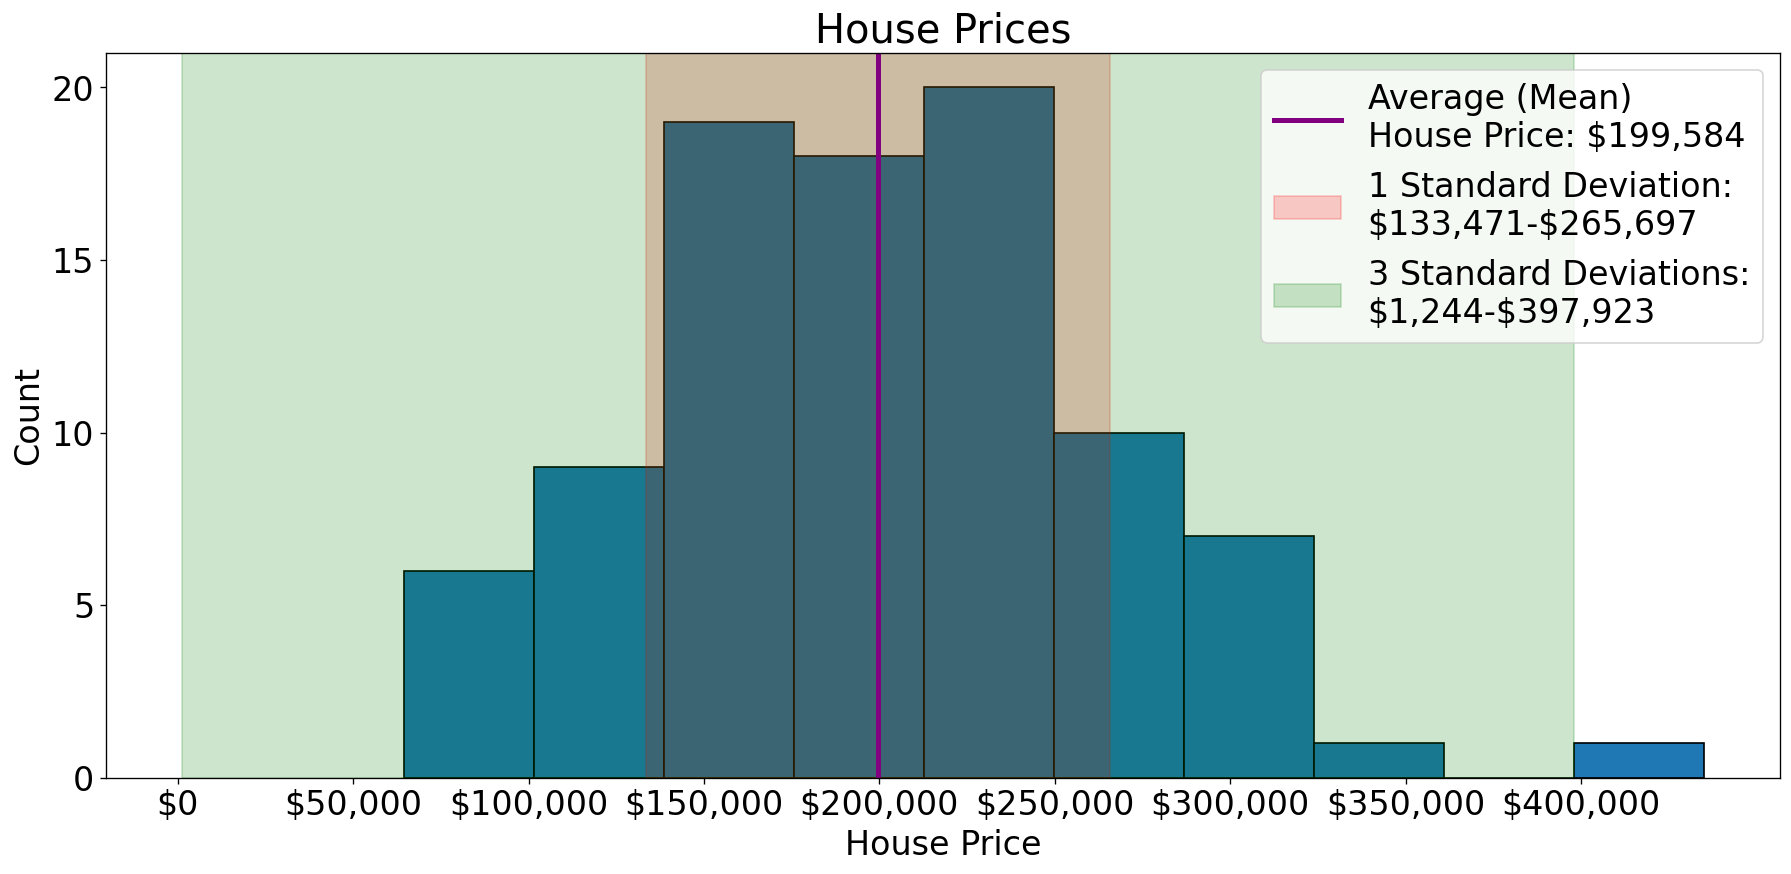

In [15]:
plt.hist(house_prices,edgecolor='black')
plt.axvline(mean_house_price,color='purple',lw=3,label=f'Average (Mean)\nHouse Price: ${mean_house_price:,.0f}')
plt.xlabel('House Price')

plt.xticks([num for num in range(0,450000,50000)],
          ['$'+str(num) + ',000' if len(str(num)) > 1 else '$' + str(num) for num in range(0,450,50)])

plt.axvspan(stdev_range[0],stdev_range[1], alpha=.2, color='red',
         label=f'1 Standard Deviation:\n${stdev_range[0]:,.0f}-\${stdev_range[1]:,.0f}')

plt.axvspan(three_stdev_range[0],three_stdev_range[1], alpha=.2, color='green',
         label=f'3 Standard Deviations:\n${three_stdev_range[0]:,.0f}-\${three_stdev_range[1]:,.0f}')

plt.yticks(range(0,25,5))

plt.ylabel('Count')
plt.title('House Prices')
plt.legend();

In [16]:
prop_one_stdev_range = ([house_price in range(int(stdev_range[0]),
                      int(stdev_range[1])) for house_price in house_prices].count(True))/len(house_prices)

prop_three_stdev_range = ([house_price in range(int(three_stdev_range[0]),
                      int(three_stdev_range[1])) for house_price in house_prices].count(True))/len(house_prices)

print(f'{prop_one_stdev_range:.0%} of the house prices are within 1 standard deviation')
print(f'{prop_three_stdev_range:.0%} of the house prices are within 3 standard deviations')

68% of the house prices are within 1 standard deviation
99% of the house prices are within 3 standard deviations


# **Scenario 2**

**Over time, the house prices fall in the neighborhood. From the histogram below we can see that the house prices are less varied compared to the previous period of time. This illustrates the complexity of data; most data varies over time which can change the distribution.**

In [17]:
future_house_prices = [154449, 147751, 150111, 149187, 157482, 136879, 136164, 151207, 137262, 143043, 141318, 
                       147186, 152325, 150296, 145889, 142434, 139945, 139797, 145144, 147799, 148182, 145397, 
                       141959, 142554, 150227, 147964, 137428, 143065, 144137, 156728, 147230, 145372, 160134, 
                       148774, 133765, 149517, 149912, 145456, 146554, 151001, 150072, 149201, 143438, 148584, 
                       153962, 144999, 147962, 148195, 146559, 154894, 159967, 152743, 150702, 134638, 147874, 
                       142899, 143112, 144880, 149563, 154311, 149583, 163343, 146126, 160064, 150212, 153534, 
                       150040, 156471, 133291, 147179, 151867, 151495, 145259, 149717, 158117, 149334, 153830, 
                       145768, 147812, 146307, 146328, 149024, 143102, 163284, 152608, 148193, 144430, 147076, 
                       160032, 150045, 149841]

In [18]:
future_mean = mean_calc(future_house_prices)
future_stdev = stdev(future_house_prices)

In [19]:
future_stdev_range = [future_mean-future_stdev,future_mean+future_stdev]
future_three_stdev_range = [future_mean-future_stdev*3,future_mean+future_stdev*3]

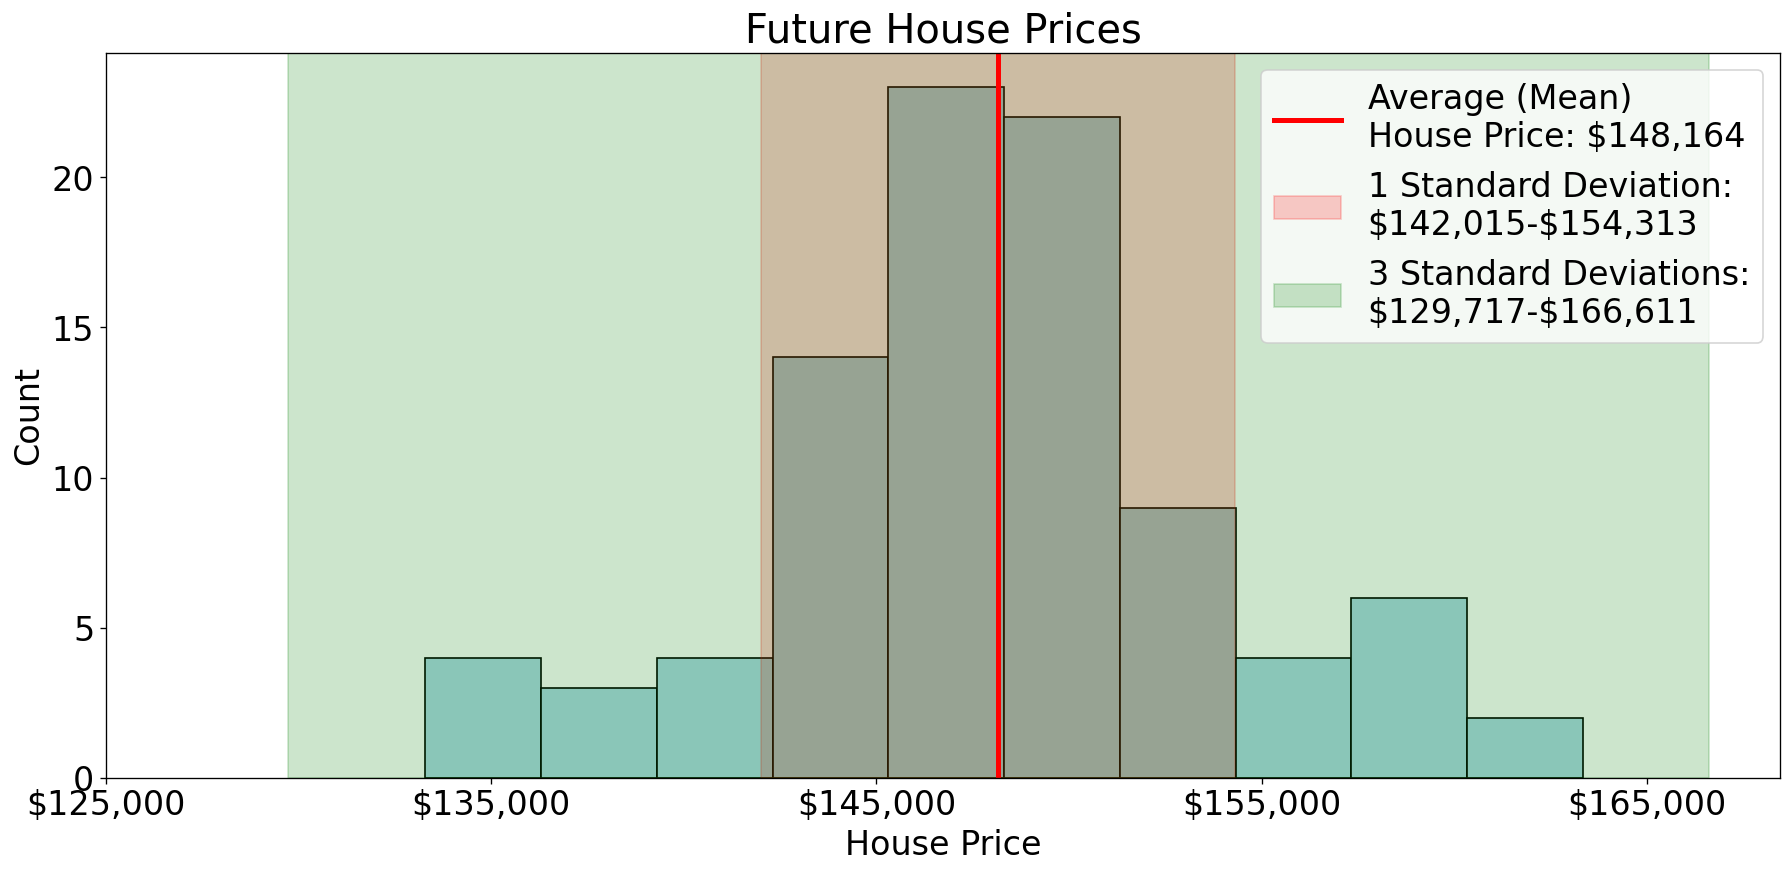

In [20]:
plt.hist(future_house_prices,edgecolor='black',color='lightblue')
plt.axvline(future_mean,color='red',lw=3,label=f'Average (Mean)\nHouse Price: ${future_mean:,.0f}')



plt.axvspan(future_stdev_range[0],future_stdev_range[1], alpha=.2, color='red',
         label=f'1 Standard Deviation:\n${future_stdev_range[0]:,.0f}-\${future_stdev_range[1]:,.0f}')

plt.axvspan(future_three_stdev_range[0],future_three_stdev_range[1], alpha=.2, color='green',
         label=f'3 Standard Deviations:\n${future_three_stdev_range[0]:,.0f}-\${future_three_stdev_range[1]:,.0f}')

plt.xticks([num for num in range(125000,175000,10000)],
          ['$'+str(num) + ',000' for num in range(125,175,10)])

plt.xlabel('House Price')
plt.ylabel('Count')
plt.title('Future House Prices')
plt.legend();

In [21]:
prop_one_f_stdev_range = ([house_price in range(int(future_stdev_range[0]),
                      int(future_stdev_range[1])) for house_price in future_house_prices].count(True))/len(future_house_prices)

prop_three_f_stdev_range = ([house_price in range(int(future_three_stdev_range[0]),
                      int(future_three_stdev_range[1])) for house_price in future_house_prices].count(True))/len(future_house_prices)

print(f'{prop_one_f_stdev_range:.0%} of the house prices are within 1 standard deviation')
print(f'{prop_three_f_stdev_range:.0%} of the house prices are within 3 standard deviations')

75% of the house prices are within 1 standard deviation
100% of the house prices are within 3 standard deviations


# **References and Additional Learning**

## **Textbook**

- **[Statistics for Engineering and the Sciences 6th Edition](https://www.amazon.com/Statistics-Engineering-Sciences-William-Mendenhall/dp/1498728855) by William M. Mendenhall and Terry L. Sincich**

## **Videos**

- **[Measures of spread: range, variance & standard deviation](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/v/range-variance-and-standard-deviation-as-measures-of-dispersion) from Khan Academy**

## **Websites**

- **[Descriptive Statistics](https://sites.nicholas.duke.edu/statsreview/descriptive/) by Elizabeth A. Albright from the Nicholas School of the Environment at Duke University**

- **[Estimation and Confidence Intervals](https://www0.gsb.columbia.edu/faculty/pglasserman/B6014/ConfidenceIntervals.pdf) by Paul Glasserman from Columbia Business School**

- **[Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation) from Wikipedia.org**

- **[Statistical Language - Measures of Spread](https://www.abs.gov.au/websitedbs/D3310114.nsf/home/statistical+language+-+measures+of+spread) from the Australian Bureau of Statistics**

- **[Variance](https://en.wikipedia.org/wiki/Variance) from Wikipedia.org**

# **Connect**

- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**